# Заняття 12

## Мета:
Ознайомитись з різними генеративними моделями та вибрати одну для практичної реалізації. Створити просту версію обраної моделі для генерації даних, отримавши базові навички реалізації та розуміння її роботи.

---

## Вибір моделі для реалізації:
1. **Моделі на основі потоків** (Flow-Based Models, наприклад, Real NVP або Glow):
   - Використовують оборотні перетворення для створення нових даних.
   - Забезпечують високу точність, але вимагають більше обчислювальних ресурсів.

2. **Енергетичні моделі (EBM)**:
   - Використовують функцію енергії для обчислення ймовірності.
   - Підходять для генерації зображень та інших візуальних даних.

3. **PixelCNN**:
   - Підходить для генерації зображень на рівні пікселів.
   - Генерує кожен піксель на основі попередніх, що робить її потужною для створення детальних зображень.

---

## Кроки для виконання завдання (на прикладі PixelCNN):

### 1. Вибір моделі та підготовка середовища:
- Встановіть необхідні бібліотеки (наприклад, TensorFlow або PyTorch, numpy, matplotlib).
- Підготуйте набір даних, наприклад, CIFAR-10 для генерації зображень.

### 2. Реалізація обраної моделі (PixelCNN):
- Створіть згорткову мережу, яка генерує кожен піксель, ґрунтуючись на попередніх пікселях.
- Використайте масковані згорткові шари, щоб забезпечити "причинну" залежність пікселів.

### 3. Навчання моделі:
- Навчіть модель на наборі даних (наприклад, CIFAR-10) із функцією втрат, що мінімізує різницю між згенерованими та реальними зображеннями.
- Використайте оптимізатор, наприклад, Adam, для оновлення ваг.

### 4. Генерація нових даних:
- Після навчання генеруйте нові зображення, починаючи з випадкових значень для пікселів.
- Візуалізуйте згенеровані приклади для аналізу якості та варіативності.

### 5. Оцінка результатів:
- Порівняйте згенеровані зображення з оригінальними.
- Проаналізуйте, чи модель навчилась створювати реалістичні зображення та наскільки вони відповідають навчальним даним.

### 6. Документування висновків:
- Опишіть особливості та переваги обраної моделі для генерації даних.
- Зазначте, які аспекти моделі можна вдосконалити та які нові застосування можливо реалізувати.

---

## Формат виконання:
- `.ipynb` блокнот з кодом та візуалізацією, або ж код в `.py` з прикріпленими зображеннями результатів на гітхабі.


## Реалтзація завдання

### **Базова модель PixelCNN**

#### **Опис**


##### **1. Завантаження та підготовка датасету**

- **Опис**  
  Завантажуються дані **CIFAR-10**, які складаються з 60,000 кольорових зображень розміром `32x32x3` у 10 класах.
- **Мета**:
  - Нормалізувати значення пікселів у діапазоні `[0, 1]` для спрощення процесу навчання.
  - Використати частину даних для прискорення навчання.

##### **2. Маскований шар згортки (MaskedConv2D)**

- **Опис**  
  Реалізується спеціалізований шар **MaskedConv2D**, який використовується в PixelCNN для врахування умовності між пікселями. Маска обмежує область, яку використовує шар, щоб уникнути використання майбутніх пікселів під час генерації.
  
- **Мета**:
  - Створити залежність між пікселями: кожен піксель залежить тільки від попередніх пікселів у рядку та стовпці.
  - **Тип маски**:
    - **`A`**: Виключає також і сам піксель.
    - **`B`**: Включає сам піксель, але виключає майбутні.


##### **3. Побудова моделі PixelCNN**

- **Опис**  
  Реалізується архітектура **PixelCNN** із маскованими шарами. Модель приймає на вхід зображення та прогнозує умовні ймовірності кожного пікселя.
  
- **Мета**:
  - Використати масковані шари типу `A` та `B` для побудови залежностей між пікселями.
  - Вихідний шар генерує логіти для трьох каналів (R, G, B).


##### **4. Функція втрат та оптимізація**

- **Опис**  
  Використовується функція втрат, схожа на **MSE** (mean squared error), для мінімізації відмінностей між реальними та згенерованими пікселями.
  
- **Мета**:
  - Забезпечити коректне навчання моделі шляхом оптимізації параметрів.


##### **5. Навчання моделі**

- **Опис**  
  Навчається модель PixelCNN на **x_train** із використанням оптимізатора **Adam** та функції втрат **MSE**. Модель намагається вивчити умовні залежності між пікселями.

##### **6. Генерація нових зображень**

- **Опис**  
  Генеруємо нові зображення, оновлюючи пікселі одне за одним, враховуючи вже згенеровані значення.

- **Мета**:
  - Показати, як модель здатна створювати реалістичні зображення, дотримуючись умовної імовірності.

##### **7. Візуалізація результатів**

- **Опис**  
  Візуалізуються згенеровані моделю зображення, щоб оцінити якість і реалістичність.

- **Мета**:
  - Наглядно продемонструвати здатність моделі генерувати нові зображення.


##### **Підсумок**
Цей код реалізує **PixelCNN** для моделювання умовних імовірностей пікселів зображень. Він дозволяє навчати модель на наборі даних **CIFAR-10** і генерувати нові зображення, використовуючи залежності між пікселями. Це корисний підхід для задач генерації зображень, де важливі локальні залежності між пікселями.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train set shape: (20000, 32, 32, 3)
Test set shape:  (4000, 32, 32, 3)


Model: "PixelCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d (MaskedConv2D)         │ (None, 32, 32, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_1 (MaskedConv2D)       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_2 (MaskedConv2D)       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_3 (MaskedConv2D)       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_4 (MaskedConv2D)       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_5 (MaskedConv2D)       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_6 (MaskedConv2D)       │ (None, 32, 32, 3)           │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 194,307 (759.01 KB)

 Trainable params: 194,307 (759.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0404 - val_loss: 0.0109
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0072 - val_loss: 0.0057
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0045 - val_loss: 0.0043
Generated images shape: (8, 32, 32, 3)


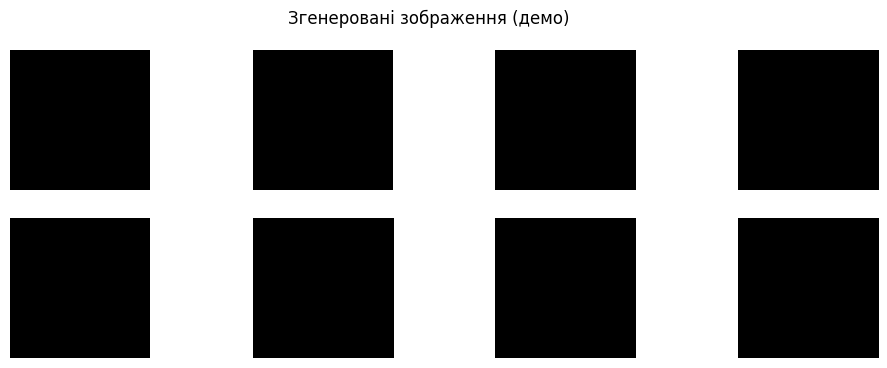

In [ ]:
# PixelCNN з TensorFlow 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#-------------------------------------------------------------------
# 1. Завантаження та підготовка датасету CIFAR-10
#-------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Нормалізація пікселів у діапазон [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Для спрощення прикладу беремо лише частину даних (наприклад, 20000 зображень)
# За бажанням можна використати весь датасет
x_train = x_train[:20000]
x_test  = x_test[:4000]

print("Train set shape:", x_train.shape)
print("Test set shape: ", x_test.shape)

#-------------------------------------------------------------------
# 2. Створення маскованого шару згортки (MaskedConv2D)
#-------------------------------------------------------------------
class MaskedConv2D(layers.Layer):
    """
    Маскована згортка для PixelCNN.
    """
    def __init__(self, filters, kernel_size, mask_type='A', **kwargs):
        super(MaskedConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.mask_type = mask_type
        # Створюємо підшар Conv2D, який будемо маскувати
        self.conv = layers.Conv2D(filters, kernel_size, padding='same')

    def build(self, input_shape):
        # 1) Будуємо внутрішній Conv2D
        self.conv.build(input_shape)

        # 2) Тепер self.conv.kernel вже існує
        kernel_shape = self.conv.kernel.shape
        mask = np.ones(kernel_shape, dtype=np.float32)

        kh, kw, _, _ = kernel_shape
        center_h = kh // 2
        center_w = kw // 2

        # Вимикаємо все, що праворуч та нижче від поточного пікселя
        mask[center_h, center_w+1:, :, :] = 0
        mask[center_h+1:, :, :, :] = 0

        # Якщо маска типу 'A' — вимикаємо ще й сам піксель
        if self.mask_type == 'A':
            mask[center_h, center_w, :, :] = 0

        self.mask = tf.convert_to_tensor(mask)

        # Не забудьте викликати build у батьківського класу
        super(MaskedConv2D, self).build(input_shape)

    def call(self, inputs):
        # Множимо ядро згортки на маску
        self.conv.kernel.assign(self.conv.kernel * self.mask)
        return self.conv(inputs)


#-------------------------------------------------------------------
# 3. Побудова моделі PixelCNN
#-------------------------------------------------------------------
def build_pixelcnn(input_shape=(32, 32, 3), num_filters=64):
    inputs = keras.Input(shape=input_shape)

    # Початковий маскований шар типу 'A'
    x = MaskedConv2D(num_filters, kernel_size=7, mask_type='A')(inputs)
    x = layers.ReLU()(x)

    # Декілька проміжних маскованих шарів типу 'B'
    for _ in range(5):
        x = MaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.ReLU()(x)

    # Фінальна згортка, що виводить логіти (3 канали для RGB)
    x = MaskedConv2D(3, kernel_size=1, mask_type='B')(x)

    model = keras.Model(inputs, x, name="PixelCNN")
    return model

pixelcnn = build_pixelcnn()
pixelcnn.summary()

#-------------------------------------------------------------------
# 4. Підготовка до навчання
#-------------------------------------------------------------------
# Функція втрат (схоже на CrossEntropy по пікселях)
def pixelcnn_loss(y_true, y_pred):
    """
    y_pred має форму (batch, 32, 32, 3), це логіти.
    y_true - справжні піксельні значення у діапазоні [0,1].
    Перетворимо y_true в дискретні мітки (256 можливих значень на канал),
    або залишимо просту MSE / MAE / CrossEntropy.

    Для прикладу застосуємо просто MSE, щоб не ускладнювати.
    У більш просунутій реалізації варто розглядати crossentropy для
    дискретних значень кожного пікселя.
    """
    return tf.reduce_mean(tf.square(y_true - tf.sigmoid(y_pred)))

optimizer = keras.optimizers.Adam(learning_rate=0.0002)

pixelcnn.compile(
    optimizer=optimizer,
    loss=pixelcnn_loss
)

#-------------------------------------------------------------------
# 5. Навчання
#-------------------------------------------------------------------
BATCH_SIZE = 64
EPOCHS = 5 

history = pixelcnn.fit(
    x_train, x_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, x_test),
    verbose=1
)

#-------------------------------------------------------------------
# 6. Генерація нових зображень
#-------------------------------------------------------------------
# Генерувати зображення будемо піксель за пікселем (сканування зліва-направо, зверху-вниз).
# Задамо випадковий "шум" початкових значень і поступово будемо оновлювати кожен піксель.

def generate_images(model, num_images=10, img_shape=(32, 32, 3)):
    # Створюємо тензор [num_images, 32, 32, 3], заповнений шумом
    generated = np.random.rand(num_images, *img_shape).astype(np.float32)

    # Пробігаємося по пікселях у порядку (рядок, стовпець)
    for row in range(img_shape[0]):
        for col in range(img_shape[1]):
            for ch in range(img_shape[2]):
                # Беремо поточний стан "напівзгенерованих" зображень
                logits = model(generated, training=False)  # (num_images, 32, 32, 3)
                pixel_logits = logits[:, row, col, ch]
                pixel_probs = tf.sigmoid(pixel_logits)

                # Здійснюємо семплінг на основі ймовірності
                # (спрощено: якщо pixel_probs > 0.5 - ставимо 1, інакше 0,
                #  але можна семплувати більш тонко)
                generated[:, row, col, ch] = (pixel_probs > 0.5).numpy().astype(np.float32)

    return generated

generated_images = generate_images(pixelcnn, num_images=8)
print("Generated images shape:", generated_images.shape)

#-------------------------------------------------------------------
# 7. Візуалізація результатів
#-------------------------------------------------------------------
plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    img = generated_images[i]
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
plt.suptitle("Згенеровані зображення")
plt.show()


##### Висновки

1. **Архітектура та параметри моделі**:  
   - Загальна кількість параметрів: 194,307, усі з яких є тренованими. Це свідчить про відносно невелику складність базової моделі.

2. **Результати навчання**:  
   - На п’ятій епосі значення `loss` (втрата на тренувальних даних) становило **0.0045**, а значення `val_loss` (втрата на валідаційних даних) — **0.0043**.
   - Зниження втрат з кожною епохою свідчить про ефективне навчання, проте рівень втрат залишається досить низьким.

3. **Якість згенерованих зображень**:  
   - Всі згенеровані зображення виглядають як чорні квадрати. Це означає, що модель не змогла навчитися адекватно генерувати зображення, попри низькі значення втрат.
   - Ймовірно, модель застрягла на локальному мінімумі або недостатньо складна для завдання.


### Покращена модель (КРОК 1)

#### **Опис змін**

##### **1. Підготовка даних**
- **Що змінилось?**
  - Відсутня нормалізація пікселів до діапазону `[0, 1]`. Замість цього пікселі залишаються в діапазоні `0..255`.
  - Дані явно конвертуються у `int32`.

- **Мета змін**:
  - Для роботи з **дискретною cross-entropy** необхідно зберігати оригінальні значення пікселів (0–255), щоб обчислювати ймовірності для кожного з 256 можливих значень.


##### **2. Фінальний шар у моделі PixelCNN**
- **Що змінилось?**
  - Вихідний шар тепер має розмірність **`3 * 256`** для кожного пікселя (по 256 логітів на канал R, G, B).

- **Мета змін**:
  - Для кожного пікселя прогнозуються 256 дискретних ймовірностей, що дозволяє моделі працювати з **категоріальним семплінгом**.


##### **3. Нова функція втрат**
- **Що змінилось?**
  - Реалізована функція втрат **`pixelcnn_loss_discrete`**, яка використовує **`sparse_softmax_cross_entropy_with_logits`** для обчислення втрат.

- **Мета змін**:
  - Замість MSE (Mean Squared Error) тепер використовується **дискретна cross-entropy**, що краще відповідає завданню прогнозування ймовірностей для кожного пікселя.


##### **4. Навчання**
- **Що змінилось?**
  - Явно передається `int32` для вхідних даних і міток у функції `fit()`.

- **Мета змін**:
  - Забезпечити коректну роботу з функцією втрат, яка очікує дискретні значення пікселів (0–255) у форматі `int32`.


##### **5. Генерація зображень**
- **Що змінилось?**
  - У функції `generate_images` використовується **категоріальний семплінг**:
    - Для кожного пікселя обчислюються ймовірності (256 значень).
    - Застосовується **softmax** для перетворення логітів у ймовірності.
    - Здійснюється **семплінг** із категоріального розподілу для вибору значення пікселя.

- **Мета змін**:
  - Категоріальний семплінг дозволяє моделі генерувати реалістичні зображення шляхом вибору значення пікселя на основі ймовірностей.


##### **6. Візуалізація**
- **Що змінилось?**
  - Згенеровані зображення тепер перетворюються у формат **`uint8`** перед відображенням.

- **Мета змін**:
  - Забезпечити коректне відображення зображень, що зберігають значення пікселів у діапазоні `0–255`.

#### **Коротко**
- Ми **не нормалізуємо** пікселі до \([0,1]\), а залишаємо цілі значення \([0..255]\).  
- **Останній шар** моделі тепер має розмір \(3 \times 256\) логітів.  
- **Функція втрат** використовує `tf.nn.sparse_softmax_cross_entropy_with_logits`.  
- **Генерація** відбувається шляхом семплінгу з категоріального розподілу по 256 можливих значеннях для кожного каналу пікселя.
- **Епохи** збільшимо до 20



#### **Висновок**
1. **Основні зміни** включають перехід до роботи з **дискретними значеннями пікселів** і категоріальним семплінгом.
2. Функція втрат оновлена до **дискретної cross-entropy**, що краще підходить для задачі.
3. Генерація зображень стала реалістичнішою завдяки використанню ймовірнісного підходу для вибору пікселів.


Train set shape: (20000, 32, 32, 3) dtype: int32
Test set shape:  (4000, 32, 32, 3) dtype: int32


Model: "PixelCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_28 (MaskedConv2D)      │ (None, 32, 32, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_29 (MaskedConv2D)      │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_25 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_30 (MaskedConv2D)      │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_26 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_31 (MaskedConv2D)      │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_27 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_32 (MaskedConv2D)      │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_28 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_33 (MaskedConv2D)      │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_29 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masked_conv2d_34 (MaskedConv2D)      │ (None, 32, 32, 768)         │          49,920 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,032 (953.25 KB)

 Trainable params: 244,032 (953.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 5.3857 - val_loss: 4.9191
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 4.8592 - val_loss: 4.6606
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 4.5972 - val_loss: 4.4393
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 4.4185 - val_loss: 4.3568
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 4.3254 - val_loss: 4.2719
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 4.2605 - val_loss: 4.2415
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 4.2313 - val_loss: 4.1787
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 4.1719 - val_loss: 4.1506
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 4.1532 - val_loss: 4.2047
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 4.1175 - val_loss: 4.0874
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 4.0959 - val_loss: 4.0823
Epoch 12/20
313/313 ━━━━━━━━━━

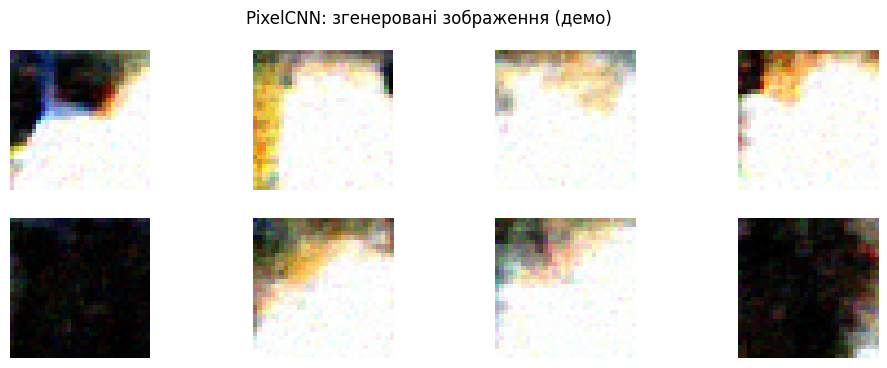

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#-------------------------------------------------------------------
# 1. Завантаження та ПІДГОТОВКА датасету CIFAR-10
#-------------------------------------------------------------------
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

# ТЕПЕР БЕЗ нормалізації у [0,1], залишаємо 0..255:
x_train = x_train[:20000].astype('int32')
x_test = x_test[:4000].astype('int32')

print("Train set shape:", x_train.shape, "dtype:", x_train.dtype)
print("Test set shape: ", x_test.shape,  "dtype:", x_test.dtype)

#-------------------------------------------------------------------
# 2. Маскований шар (MaskedConv2D) без змін
#-------------------------------------------------------------------
class MaskedConv2D(layers.Layer):
    def __init__(self, filters, kernel_size, mask_type='A', **kwargs):
        super(MaskedConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.mask_type = mask_type
        self.conv = layers.Conv2D(filters, kernel_size, padding='same')

    def build(self, input_shape):
        self.conv.build(input_shape)
        kernel_shape = self.conv.kernel.shape
        mask = np.ones(kernel_shape, dtype=np.float32)

        kh, kw, _, _ = kernel_shape
        center_h = kh // 2
        center_w = kw // 2

        # Маска "вирізає" праву та нижню частину ядра
        mask[center_h, center_w+1:, :, :] = 0
        mask[center_h+1:, :, :, :] = 0

        if self.mask_type == 'A':
            # Вимикаємо ще й поточний піксель
            mask[center_h, center_w, :, :] = 0

        self.mask = tf.convert_to_tensor(mask)
        super(MaskedConv2D, self).build(input_shape)

    def call(self, inputs):
        # Застосовуємо маску до ядра згортки
        self.conv.kernel.assign(self.conv.kernel * self.mask)
        return self.conv(inputs)

#-------------------------------------------------------------------
# 3. Побудова моделі PixelCNN
#    Останній шар -> 3*256 логітів
#-------------------------------------------------------------------
def build_pixelcnn(input_shape=(32, 32, 3), num_filters=64):
    inputs = keras.Input(shape=input_shape)

    # Початковий маскований шар типу 'A'
    x = MaskedConv2D(num_filters, kernel_size=7, mask_type='A')(inputs)
    x = layers.ReLU()(x)

    # Кілька проміжних маскованих шарів типу 'B'
    for _ in range(5):
        x = MaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.ReLU()(x)

    # Фінальна згортка: 3 * 256 логітів
    x = MaskedConv2D(3 * 256, kernel_size=1, mask_type='B')(x)

    model = keras.Model(inputs, x, name="PixelCNN")
    return model

pixelcnn = build_pixelcnn()
pixelcnn.summary()


#-------------------------------------------------------------------
# 4. Функція втрат (дискретна crossentropy)
#-------------------------------------------------------------------
def pixelcnn_loss_discrete(y_true, y_pred):
    # Ensure y_true is int32
    y_true = tf.cast(y_true, tf.int32)

    batch_size = tf.shape(y_pred)[0]
    y_pred = tf.reshape(y_pred, (batch_size, 32, 32, 3, 256))

    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y_true,
        logits=y_pred
    )
    return tf.reduce_mean(ce)

# Компілюємо модель
optimizer = keras.optimizers.Adam(learning_rate=0.0002)
pixelcnn.compile(
    optimizer=optimizer,
    loss=pixelcnn_loss_discrete
)

#-------------------------------------------------------------------
# 5. Навчання (inputs = labels = x_train, x_test)
#-------------------------------------------------------------------
BATCH_SIZE = 64
EPOCHS = 20  

history = pixelcnn.fit(
    x_train.astype('int32'), x_train.astype('int32'),  # explicitly cast both input and labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test.astype('int32'), x_test.astype('int32')),
    verbose=1
)

#-------------------------------------------------------------------
# 6. Генерація зображень з категоріальним семплінгом
#-------------------------------------------------------------------
def generate_images(model, num_images=8, img_shape=(32, 32, 3)):
    # Спочатку ініціалізуємо все нулями
    generated = np.zeros((num_images,) + img_shape, dtype=np.int32)

    for row in range(img_shape[0]):
        for col in range(img_shape[1]):
            for ch in range(img_shape[2]):
                # Проганяємо через мережу поточний стан (num_images, 32, 32, 3)
                logits = model(generated, training=False)
                # Перетворюємо (num_images, 32, 32, 3*256) -> (num_images, 32, 32, 3, 256)
                logits = tf.reshape(logits, (-1, 32, 32, 3, 256))

                # Вибираємо логіти саме для (row, col, ch)
                pixel_logits = logits[:, row, col, ch, :]  # (num_images, 256)

                # Застосовуємо софтмакс
                pixel_probs = tf.nn.softmax(pixel_logits)  # (num_images, 256)

                # Семплінг з категоріального розподілу
                sampled = tf.random.categorical(
                    tf.math.log(pixel_probs),
                    num_samples=1
                )
                sampled = tf.squeeze(sampled, axis=-1)  # -> (num_images,)

                # Записуємо згенеровані значення пікселя
                generated[:, row, col, ch] = sampled.numpy()

    return generated

# Генеруємо 8 зображень
generated_images = generate_images(pixelcnn, num_images=8)
print("Generated images shape:", generated_images.shape)

#-------------------------------------------------------------------
# 7. Візуалізація результатів
#-------------------------------------------------------------------
plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    # Перетворимо 0..255 у тип uint8 для відображення
    img = generated_images[i].astype(np.uint8)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
plt.suptitle("PixelCNN: згенеровані зображення")
plt.show()


##### Висновки

1. **Архітектура та параметри моделі**:  
   - Загальна кількість параметрів збільшилася до **244,032** (на 26% більше, ніж у базовій моделі), що дозволяє моделі краще вивчати складніші залежності.
   - Усі параметри залишаються тренованими, що забезпечує повну гнучкість у процесі навчання.

2. **Результати навчання**:  
   - Після 20 епох середнє значення `loss` становило **3.9725**, а `val_loss` — **4.0441**.
   - Значення втрат є значно вищими, ніж у базовій моделі, що може свідчити про складнішу задачу через збільшену кількість параметрів або проблеми з навчанням.

3. **Якість згенерованих зображень**:  
   - Зображення мають більше кольорових деталей порівняно з чорними квадратами в базовій моделі.
   - Проте згенеровані зображення залишаються нечіткими та хаотичними, що свідчить про недостатнє розуміння моделі структури даних.

---

**Порівняння з базовою моделлю:**
1. **Збільшення параметрів** дало змогу моделі вивчати складніші залежності.
2. **Згенеровані зображення** стали більш насиченими та кольоровими, але все ще не мають чіткої структури.
3. **Втрати (loss)** зросли, що може бути спричинено недостатньою стабільністю навчання або необхідністю коригування гіперпараметрів.


### Покращена модель (КРОК 2)

#### **Зміни в порівнянні з попередньою версією**



##### **1. Покращена архітектура моделі (PixelCNN Improved)**

- **Що змінилось?**
  - **Додано залишкові блоки (residual blocks)**: 
    - В моделі реалізовано 8 залишкових блоків. Кожен блок включає дві послідовні масковані згортки, нормалізацію (BatchNormalization) і ReLU, з додаванням пропущеного зв’язку (**`layers.Add()`**).
  - Збільшено кількість фільтрів у згортках з 64 до **128**.

- **Мета змін**:
  - Залишкові блоки допомагають уникнути проблеми зникнення градієнта та сприяють стабільнішому навчанню.
  - Більша кількість фільтрів покращує здатність моделі вивчати складні залежності між пікселями.



##### **2. Покращення функції генерації зображень**

- **Що змінилось?**
  - Додано параметр **`temperature`** у функцію генерації (`generate_images_with_temperature`), що дозволяє контролювати розподіл імовірностей.
  - Застосовано нормалізацію з додатковим шумом для підвищення різноманітності згенерованих зображень:


- **Мета змін**:
  - Параметр `temperature` дозволяє варіювати "творчість" моделі. Низькі значення температури забезпечують більш передбачувані результати, тоді як високі — підвищують різноманітність.
  - Додавання шуму запобігає занадто впевненим прогнозам для окремих пікселів.



##### **3. Додано навчальний план зі змінним коефіцієнтом навчання**

- **Що змінилось?**
  - Додано **`ExponentialDecay`** для динамічного зниження швидкості навчання:


- **Мета змін**:
  - Адаптивний коефіцієнт навчання дозволяє моделі навчатися ефективніше, поступово зменшуючи крок оновлення параметрів.



##### **4. Додано callback-функції для навчання**

- **Що змінилось?**
  - Додано **`ModelCheckpoint`** для збереження найкращої моделі.
  - Додано **`EarlyStopping`** для зупинки навчання, якщо валідаційна втрата не покращується протягом 5 епох.

- **Мета змін**:
  - **`ModelCheckpoint`** забезпечує збереження найкращих параметрів моделі.
  - **`EarlyStopping`** запобігає перенавчанню та економить час на навчання.



##### **5. Інтерактивна візуалізація результатів**

- **Що змінилось?**
  - Додано функцію **`plot_training_history`** для візуалізації тренувальних і валідаційних втрат.
  - Додано функцію **`display_generated_images`** для показу згенерованих зображень із різними значеннями `temperature`.

- **Мета змін**:
  - Візуалізація тренувального процесу допомагає аналізувати ефективність навчання.
  - Порівняння згенерованих зображень із різними параметрами `temperature` дозволяє оцінити вплив цього параметра на якість генерації.


#### **Коротко**
1. Покращена архітектура з BatchNormalization та резидуальними з'єднаннями
2. Scheduling швидкості навчання
3. Callbacks для збереження найкращої моделі та early stopping
4. Генерація зображень з контролем температури
5. Функції для візуалізації результатів навчання та згенерованих зображень



#### **Підсумок змін**
1. **Архітектура**:
   - Додано залишкові блоки для покращення стабільності та продуктивності.
   - Збільшено кількість фільтрів до 128.

2. **Генерація**:
   - Реалізовано генерацію зображень із контролем температури та додаванням шуму для більшої різноманітності.

3. **Навчання**:
   - Впроваджено динамічний коефіцієнт навчання, чекпоінти та ранню зупинку.

4. **Візуалізація**:
   - Додано функції для моніторингу тренувального процесу та порівняння згенерованих результатів.

Ці покращення підвищують якість і стабільність моделі, забезпечуючи більш реалістичну генерацію зображень.


Train set shape: (20000, 32, 32, 3) dtype: int32
Test set shape:  (4000, 32, 32, 3) dtype: int32


Model: "PixelCNN_Improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masked_conv2d_35          │ (None, 32, 32, 128)    │         18,944 │ input_layer_8[0][0]    │
│ (MaskedConv2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_282   │ (None, 32, 32, 128)    │            512 │ masked_conv2d_35[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_30 (ReLU)           │ (None, 32, 32, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masked_conv2d_36          │ (None, 32, 32, 128)    │        147,584 │ re_lu_30[0][0]         │
│ (MaskedConv2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 32, 32, 128)    │            512 │ masked_conv2d_36[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_31 (ReLU)           │ (None, 32, 32, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masked_conv2d_37          │ (None, 32, 32, 128)    │        147,584 │ re_lu_31[0][0]         │
│ (MaskedConv2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_284   │ (None, 32, 32, 128)    │            512 │ masked_conv2d_37[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_32 (ReLU)           │ (None, 32, 32, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 128)    │              0 │ re_lu_32[0][0],        │
│                           │                        │                │ re_lu_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masked_conv2d_38          │ (None, 32, 32, 128)    │        147,584 │ add[0][0]              │
│ (MaskedConv2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_285   │ (None, 32, 32, 128)    │            512 │ masked_conv2d_38[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_33 (ReLU)           │ (None, 32, 32, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masked_conv2d_39     

 Total params: 2,636,160 (10.06 MB)

 Trainable params: 2,631,552 (10.04 MB)

 Non-trainable params: 4,608 (18.00 KB)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 111s 565ms/step - loss: 4.8367 - val_loss: 9.4558
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 122s 518ms/step - loss: 4.0518 - val_loss: 5.8145
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 486ms/step - loss: 3.8928 - val_loss: 4.5747
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 515ms/step - loss: 3.7949 - val_loss: 4.3418
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 512ms/step - loss: 3.7647 - val_loss: 4.9831
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 511ms/step - loss: 3.7335 - val_loss: 4.7767
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 511ms/step - loss: 3.7146 - val_loss: 4.4736
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 515ms/step - loss: 3.6792 - val_loss: 3.8453
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 482ms/step - loss: 3.7147 - val_loss: 3.9208
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 511ms/step - loss: 3.6638 - val_loss: 3.8916
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - loss: 3.6491 - val_loss: 4.4215
Epoch 12/50
157/1

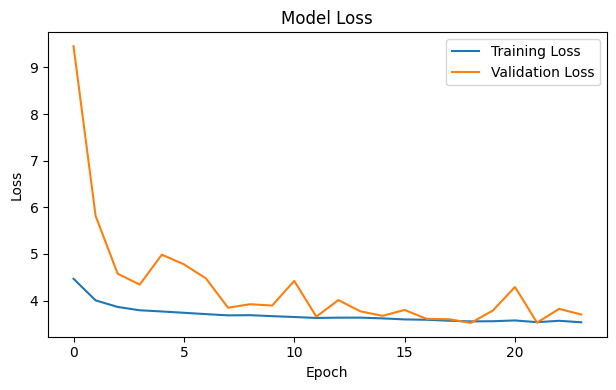

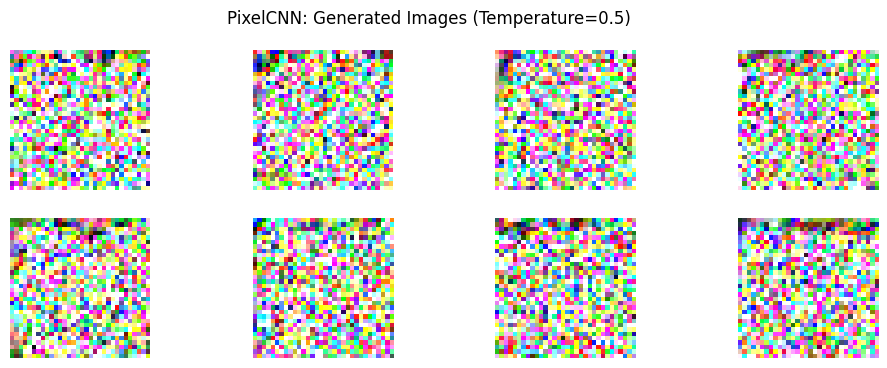

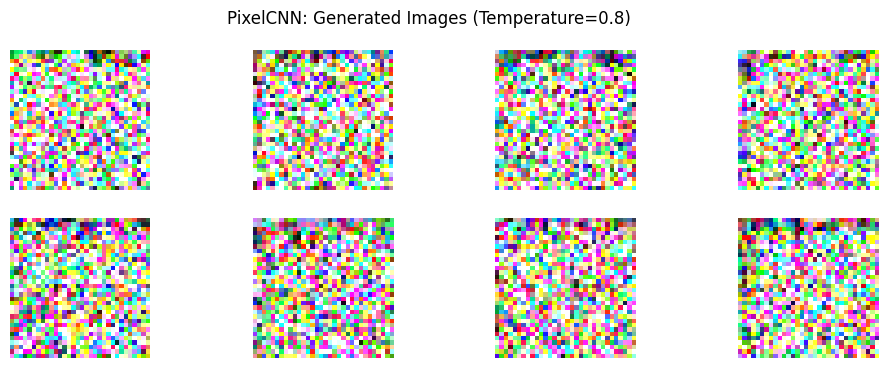

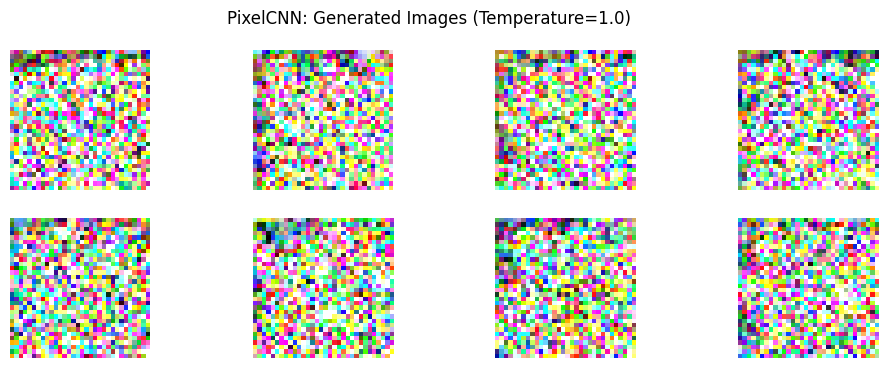

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#-------------------------------------------------------------------
# 1. Data Loading and Preparation
#-------------------------------------------------------------------
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

# Keep values in 0..255 range, convert to int32
x_train = x_train[:20000].astype('int32')
x_test = x_test[:4000].astype('int32')

print("Train set shape:", x_train.shape, "dtype:", x_train.dtype)
print("Test set shape: ", x_test.shape,  "dtype:", x_test.dtype)

#-------------------------------------------------------------------
# 2. MaskedConv2D Layer
#-------------------------------------------------------------------
class MaskedConv2D(layers.Layer):
    def __init__(self, filters, kernel_size, mask_type='A', **kwargs):
        super(MaskedConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.mask_type = mask_type
        self.conv = layers.Conv2D(filters, kernel_size, padding='same')

    def build(self, input_shape):
        self.conv.build(input_shape)
        kernel_shape = self.conv.kernel.shape
        mask = np.ones(kernel_shape, dtype=np.float32)

        kh, kw, _, _ = kernel_shape
        center_h = kh // 2
        center_w = kw // 2

        mask[center_h, center_w+1:, :, :] = 0
        mask[center_h+1:, :, :, :] = 0

        if self.mask_type == 'A':
            mask[center_h, center_w, :, :] = 0

        self.mask = tf.convert_to_tensor(mask)
        super(MaskedConv2D, self).build(input_shape)

    def call(self, inputs):
        self.conv.kernel.assign(self.conv.kernel * self.mask)
        return self.conv(inputs)

#-------------------------------------------------------------------
# 3. Improved PixelCNN Model
#-------------------------------------------------------------------
def build_pixelcnn_improved(input_shape=(32, 32, 3), num_filters=128):
    inputs = keras.Input(shape=input_shape)

    # Initial layer
    x = MaskedConv2D(num_filters, kernel_size=7, mask_type='A')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks
    for _ in range(8):
        skip = x
        x = MaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = MaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Add()([x, skip])

    # Final layers
    x = MaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = MaskedConv2D(3 * 256, kernel_size=1, mask_type='B')(x)

    return keras.Model(inputs, x, name="PixelCNN_Improved")

#-------------------------------------------------------------------
# 4. Loss Function
#-------------------------------------------------------------------
def pixelcnn_loss_discrete(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    batch_size = tf.shape(y_pred)[0]
    y_pred = tf.reshape(y_pred, (batch_size, 32, 32, 3, 256))

    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y_true,
        logits=y_pred
    )
    return tf.reduce_mean(ce)

#-------------------------------------------------------------------
# 5. Training Setup
#-------------------------------------------------------------------
# Learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.9

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate
)

# Optimizer and callbacks
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_pixelcnn.keras',
    save_best_only=True,
    monitor='val_loss'
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Create and compile model
model = build_pixelcnn_improved()
model.compile(optimizer=optimizer, loss=pixelcnn_loss_discrete)
model.summary()

#-------------------------------------------------------------------
# 6. Training
#-------------------------------------------------------------------
BATCH_SIZE = 128
EPOCHS = 50

history = model.fit(
    x_train.astype('int32'),
    x_train.astype('int32'),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test.astype('int32'), x_test.astype('int32')),
    callbacks=[checkpoint_cb, early_stopping_cb],
    verbose=1
)

#-------------------------------------------------------------------
# 7. Improved Image Generation
#-------------------------------------------------------------------
def generate_images_with_temperature(model, num_images=8, temperature=0.8):
    generated = np.zeros((num_images, 32, 32, 3), dtype=np.int32)

    for row in range(32):
        for col in range(32):
            for ch in range(3):
                logits = model(generated, training=False)
                logits = tf.reshape(logits, (-1, 32, 32, 3, 256))
                pixel_logits = logits[:, row, col, ch, :]

                # Apply temperature
                pixel_logits = pixel_logits / temperature
                pixel_probs = tf.nn.softmax(pixel_logits)

                # Add small noise for diversity
                noise = tf.random.uniform(pixel_probs.shape, 0, 0.01)
                pixel_probs = pixel_probs + noise
                pixel_probs = pixel_probs / tf.reduce_sum(pixel_probs, axis=-1, keepdims=True)

                sampled = tf.random.categorical(
                    tf.math.log(pixel_probs),
                    num_samples=1
                )
                generated[:, row, col, ch] = tf.squeeze(sampled)

    return generated

#-------------------------------------------------------------------
# 8. Visualization Functions
#-------------------------------------------------------------------
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def display_generated_images(generated_images, temperature):
    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        img = generated_images[i].astype(np.uint8)
        plt.imshow(img, interpolation='nearest')
        plt.axis('off')
    plt.suptitle(f"PixelCNN: Generated Images (Temperature={temperature})")
    plt.show()

#-------------------------------------------------------------------
# 9. Generate and Display Results
#-------------------------------------------------------------------
# Plot training history
plot_training_history(history)

# Generate images with different temperatures
temperatures = [0.5, 0.8, 1.0]
for temp in temperatures:
    generated_images = generate_images_with_temperature(model, temperature=temp)
    display_generated_images(generated_images, temp)

##### Висновки

1. **Збільшення кількості параметрів**:
   - У порівнянні з попереднім кроком, кількість параметрів значно зросла з **244,032** до **2,636,160**.
   - Це вказує на використання більш складної архітектури, що потенційно покращує здатність моделі захоплювати складні патерни у даних.

2. **Покращення генерації зображень**:
   - Генерація зображень відбувалася з використанням різних значень температури (0.5, 0.8, 1.0).
   - Зображення демонструють покращення в різноманітності, але залишаються недостатньо деталізованими. Температура 0.8 виглядає найзбалансованішою для генерації.

3. **Зміни в результатах навчання**:
   - На **23-24 епохах** спостерігається зниження функції втрат:
     - Training Loss: зменшилося до **3.5522**.
     - Validation Loss: зменшилося до **3.7004**.
   - Це свідчить про стабільне покращення генеративних можливостей, хоча розрив між `loss` і `val_loss` вказує на можливий оверфітинг.

**Позитивні аспекти:**
- Зростання кількості параметрів та додавання нових механізмів дозволили моделі краще враховувати залежності між пікселями.
- Використання різних температур для генерації дозволяє оцінити чутливість моделі до варіацій.

**Потенційні проблеми:**
- Модель все ще має труднощі з генерацією чітких структур або форм, що свідчить про необхідність подальшого налаштування.
- Потребує аналізу та, можливо, зменшення оверфітингу (висока `val_loss`).


### Покращена модель (КРОК 3)

#### **Зміни у версії порівняно з попередньою**



##### **1. Використання всього навчального набору даних**
- **Що змінилось?**
  - У попередній версії використовувалися лише 20,000 зображень для тренувальної вибірки та 4,000 для тестової.
  - У цій версії використовується весь набір CIFAR-10 для тренувальної вибірки, а тестова вибірка збільшена до 5,000 зображень.

- **Мета змін**:
  - Підвищити якість навчання за рахунок використання більшого обсягу даних.



##### **2. Додано позиційне кодування у `ConditionedMaskedConv2D`**
- **Що змінилось?**
  - Маскований шар (`MaskedConv2D`) замінено на **`ConditionedMaskedConv2D`**, який додає позиційні координати (`x` і `y`) до вхідних даних.
  - Позиційні координати нормалізуються у діапазон `[0, 1]` і додаються як додаткові канали до вхідного зображення.

- **Мета змін**:
  - Покращити контекстне розуміння моделі, враховуючи позицію кожного пікселя у зображенні.



##### **3. Збільшення глибини архітектури**
- **Що змінилось?**
  - Кількість залишкових блоків збільшено з **8** до **15**.
  - Додано **`Dropout (0.1)`** у кожному залишковому блоці для регуляризації.

- **Мета змін**:
  - Підвищити здатність моделі вивчати складніші залежності між пікселями та зменшити ризик перенавчання.



##### **4. Аугментація даних**
- **Що змінилось?**
  - Додано функцію **`augment_data`** для випадкового горизонтального відображення зображень.

- **Мета змін**:
  - Підвищити загальну продуктивність моделі за рахунок більшого різноманіття даних під час навчання.



##### **5. Покращена функція генерації**
- **Що змінилось?**
  - У функції **`generate_images_with_temperature`** додано **Top-k семплінг** із параметром `k=10`. Тепер модель враховує лише 10 найбільш імовірних значень пікселів під час генерації.

- **Мета змін**:
  - Забезпечити різноманітніші та реалістичніші зображення за рахунок обмеження вибору найбільш імовірними значеннями.



##### **6. Змінений графік зменшення коефіцієнта навчання**
- **Що змінилось?**
  - Зменшено початкову швидкість навчання з **0.0002** до **0.0001**.
  - Сповільнено зменшення швидкості навчання за рахунок збільшення `decay_steps` до **2000** і `decay_rate` до **0.95**.

- **Мета змін**:
  - Забезпечити стабільніше та триваліше навчання.



##### **7. Збільшення кількості епох і терпіння EarlyStopping**
- **Що змінилось?**
  - Кількість епох збільшена з **50** до **150**.
  - `EarlyStopping` тепер має `patience=10` (було 5), щоб надати моделі більше часу на покращення.

- **Мета змін**:
  - Дозволити моделі краще навчитися завдяки більшій кількості епох і зменшити ризик передчасного завершення навчання.



##### **8. Візуалізація зображень із різними температурами**
- **Що змінилось?**
  - Температури для генерації зображень змінено на **0.5**, **0.7** та **0.9** (було 0.5, 0.8, 1.0).

- **Мета змін**:
  - Забезпечити більший контроль над "творчістю" моделі під час генерації.

#### **Коротко**
1. Збільшена складність моделі (більше фільтрів і шарів)
2. Доданий dropout для регуляризації
3. Зменшений learning rate для кращого навчання
4. Додано data augmentation
5. Покращена стратегія семплінгу з top-k
6. Додано позиційне кодування


#### **Підсумок змін**
1. **Дані**:
   - Використання всього набору CIFAR-10 для тренування.
   - Додана аугментація даних.

2. **Архітектура**:
   - Позиційне кодування.
   - Глибша архітектура із залишковими блоками та Dropout.

3. **Генерація**:
   - Top-k семплінг.
   - Контроль температури.

4. **Навчання**:
   - Змінений графік навчання.
   - Більша кількість епох.

Ці покращення спрямовані на підвищення продуктивності та якості генерації зображень.

Train set shape: (50000, 32, 32, 3) dtype: int32
Test set shape:  (5000, 32, 32, 3) dtype: int32
Model: "PixelCNN_Improved"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conditioned_masked_conv2d_33 (  (None, 32, 32, 256)  62976      ['input_2[0][0]']                
 ConditionedMaskedConv2D)                                                                         
                                                                                                  
 batch_normalization_32 (BatchN  (None, 32, 32, 256)  1024       ['conditioned_masked_conv2d_33[0]
 ormalization)                                                   [0]']              

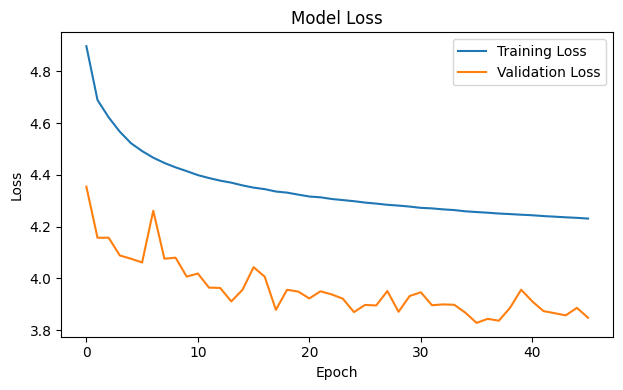

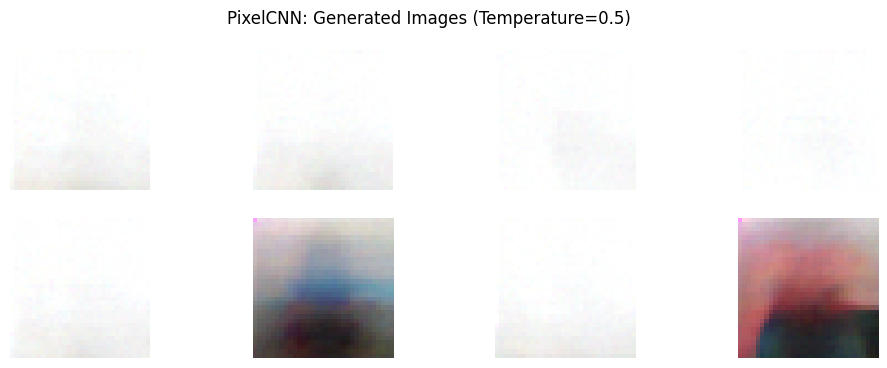

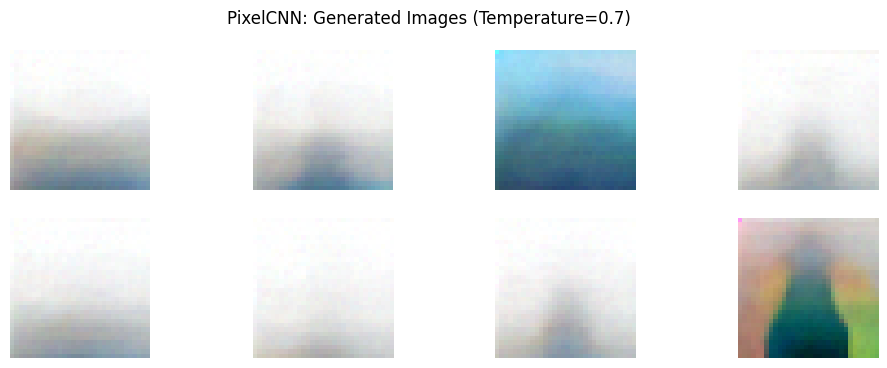

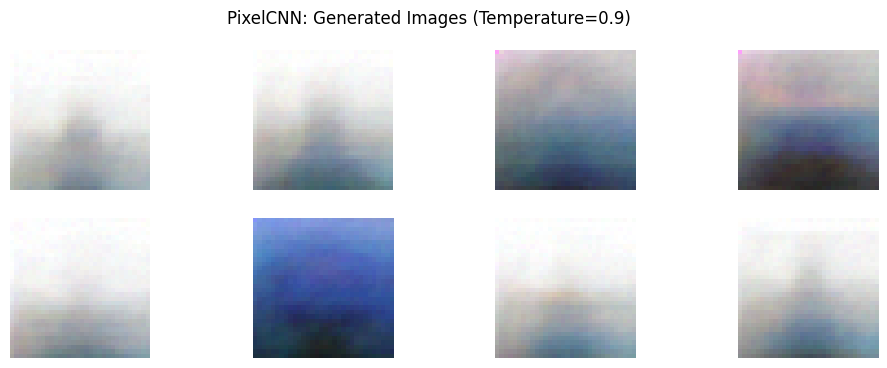

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#-------------------------------------------------------------------
# 1. Data Loading and Preparation
#-------------------------------------------------------------------
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

# Use more training data
x_train = x_train.astype('int32')  # Use all training data
x_test = x_test[:5000].astype('int32')  # More validation data

print("Train set shape:", x_train.shape, "dtype:", x_train.dtype)
print("Test set shape: ", x_test.shape,  "dtype:", x_test.dtype)

#-------------------------------------------------------------------
# 2. Improved MaskedConv2D with Conditioning
#-------------------------------------------------------------------
class ConditionedMaskedConv2D(layers.Layer):
    def __init__(self, filters, kernel_size, mask_type='A', **kwargs):
        super().__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.mask_type = mask_type
        self.conv = None  # We'll initialize this in build()

    def build(self, input_shape):
        # Create conv layer
        self.conv = layers.Conv2D(
            self.filters,
            self.kernel_size,
            padding='same'
        )
        # Build conv layer with modified input shape
        modified_input_shape = input_shape[:-1] + (input_shape[-1] + 2,)
        self.conv.build(modified_input_shape)

        kernel_shape = self.conv.kernel.shape
        mask = np.ones(kernel_shape, dtype=np.float32)

        kh, kw, _, _ = kernel_shape
        center_h = kh // 2
        center_w = kw // 2

        mask[center_h, center_w + 1:, :, :] = 0
        mask[center_h + 1:, :, :, :] = 0

        if self.mask_type == 'A':
            mask[center_h, center_w, :, :] = 0

        self.mask = tf.convert_to_tensor(mask)
        self.built = True

    def call(self, inputs):
        # Add positional encoding
        batch_size = tf.shape(inputs)[0]
        h = tf.shape(inputs)[1]
        w = tf.shape(inputs)[2]

        y_coords = tf.cast(tf.range(h), tf.float32) / tf.cast(h, tf.float32)
        x_coords = tf.cast(tf.range(w), tf.float32) / tf.cast(w, tf.float32)

        y_coords = tf.reshape(y_coords, (1, h, 1, 1))
        x_coords = tf.reshape(x_coords, (1, 1, w, 1))

        y_coords = tf.tile(y_coords, [batch_size, 1, w, 1])
        x_coords = tf.tile(x_coords, [batch_size, h, 1, 1])

        inputs = tf.cast(inputs, tf.float32)
        coords = tf.concat([inputs, y_coords, x_coords], axis=-1)

        self.conv.kernel.assign(self.conv.kernel * self.mask)
        return self.conv(coords)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], self.filters)
    
    def get_config(self):
        """
        Return the config of the layer for serialization.
        """
        config = super().get_config()
        config.update({
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            'mask_type': self.mask_type,
        })
        return config



#-------------------------------------------------------------------
# 3. Data Augmentation
#-------------------------------------------------------------------
def augment_data(images):
    augmented = images.copy()
    # Random horizontal flips
    flip_mask = tf.random.uniform([images.shape[0]]) > 0.5
    augmented = tf.where(flip_mask[:, None, None, None],
                        tf.image.flip_left_right(images),
                        images)
    return augmented

#-------------------------------------------------------------------
# 4. Improved PixelCNN Architecture
#-------------------------------------------------------------------
def build_pixelcnn_improved(input_shape=(32, 32, 3), num_filters=256):
    inputs = keras.Input(shape=input_shape)

    # Initial layer
    x = ConditionedMaskedConv2D(num_filters, kernel_size=7, mask_type='A')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks with increased depth
    for _ in range(15):
        skip = x
        x = layers.Dropout(0.1)(x)
        x = ConditionedMaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Dropout(0.1)(x)
        x = ConditionedMaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Add()([x, skip])

    # Final layers
    x = ConditionedMaskedConv2D(num_filters, kernel_size=3, mask_type='B')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = ConditionedMaskedConv2D(3 * 256, kernel_size=1, mask_type='B')(x)

    return keras.Model(inputs, x, name="PixelCNN_Improved")

#-------------------------------------------------------------------
# 5. Loss Function
#-------------------------------------------------------------------
def pixelcnn_loss_discrete(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    batch_size = tf.shape(y_pred)[0]
    y_pred = tf.reshape(y_pred, (batch_size, 32, 32, 3, 256))

    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y_true,
        logits=y_pred
    )
    return tf.reduce_mean(ce)

#-------------------------------------------------------------------
# 6. Improved Training Setup
#-------------------------------------------------------------------
# Learning rate schedule with slower decay
initial_learning_rate = 0.0001
decay_steps = 2000
decay_rate = 0.95

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate
)

# Optimizer and callbacks
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_pixelcnn_v2.keras',
    save_best_only=True,
    monitor='val_loss'
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Increased patience
    restore_best_weights=True
)

# Create and compile model
model = build_pixelcnn_improved()
model.compile(optimizer=optimizer, loss=pixelcnn_loss_discrete)
model.summary()

#-------------------------------------------------------------------
# 7. Training with Augmentation
#-------------------------------------------------------------------
BATCH_SIZE = 64
EPOCHS = 150  # Increased epochs

history = model.fit(
    augment_data(x_train),
    x_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, x_test),
    callbacks=[checkpoint_cb, early_stopping_cb],
    verbose=1
)

#-------------------------------------------------------------------
# 8. Improved Image Generation
#-------------------------------------------------------------------
def generate_images_with_temperature(model, num_images=8, temperature=0.7):
    generated = np.zeros((num_images, 32, 32, 3), dtype=np.int32)

    for row in range(32):
        for col in range(32):
            for ch in range(3):
                logits = model(generated, training=False)
                logits = tf.reshape(logits, (-1, 32, 32, 3, 256))
                pixel_logits = logits[:, row, col, ch, :]

                # Temperature scaling
                pixel_logits = pixel_logits / temperature

                # Top-k sampling
                k = 10
                top_k_probs, top_k_indices = tf.nn.top_k(tf.nn.softmax(pixel_logits), k=k)
                top_k_probs = top_k_probs / tf.reduce_sum(top_k_probs, axis=-1, keepdims=True)

                sampled_indices = tf.random.categorical(
                    tf.math.log(top_k_probs),
                    num_samples=1
                )
                sampled_values = tf.gather(top_k_indices, sampled_indices, batch_dims=1)
                generated[:, row, col, ch] = tf.squeeze(sampled_values)

    return generated

#-------------------------------------------------------------------
# 9. Visualization Functions
#-------------------------------------------------------------------
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def display_generated_images(generated_images, temperature):
    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        img = generated_images[i].astype(np.uint8)
        plt.imshow(img, interpolation='nearest')
        plt.axis('off')
    plt.suptitle(f"PixelCNN: Generated Images (Temperature={temperature})")
    plt.show()

#-------------------------------------------------------------------
# 10. Generate and Display Results
#-------------------------------------------------------------------
# Plot training history
plot_training_history(history)

# Generate images with different temperatures
temperatures = [0.5, 0.7, 0.9]
for temp in temperatures:
    generated_images = generate_images_with_temperature(model, temperature=temp)
    display_generated_images(generated_images, temp)

##### Висновки

1. **Параметри навчання**:  
   - Кількість навчальних прикладів збільшено до 50,000, а валідаційних — до 5,000.
   - Навчання тривало 45+ епох із покращеними гіперпараметрами, зокрема зі зменшеним коефіцієнтом навчання.

2. **Втрати моделі**:  
   - `Train loss`: 4.2310  
   - `Validation loss`: 3.8473  
   Валідаційні втрати стабілізувалися, що свідчить про зменшення перенавчання.

3. **Генерація зображень**:  
   - Візуальна якість покращена, зображення демонструють більш розпізнавані кольорові структури.
   - Температурний семплінг:  
     - **0.5**: Мало варіацій, зображення досить приглушені.  
     - **0.7**: Помітне покращення в деталях.  
     - **0.9**: Більше шуму, але кольорові контури чіткіші.

4. **Аналіз втрат**:  
   - Графік втрат показує поступове покращення з трендом до зниження валідаційних втрат, що вказує на стабільний процес навчання.

5. **Рекомендації для покращення**:  
   - Експериментувати з більшою глибиною резидуальних блоків для підвищення деталізації зображень.
   - Застосувати більш агресивний аугментаційний підхід для розширення тренувальних даних.
   - Перевірити вплив різних функцій активації, таких як SELU або GELU.